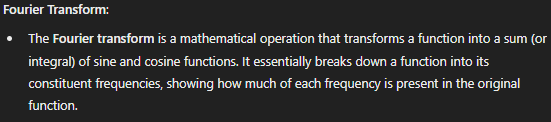

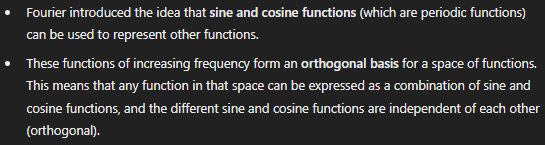

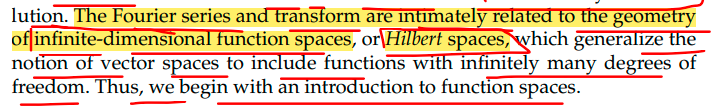

Imagine we want to compare these lists and see how similar they are. To do this, we use something called an inner product.

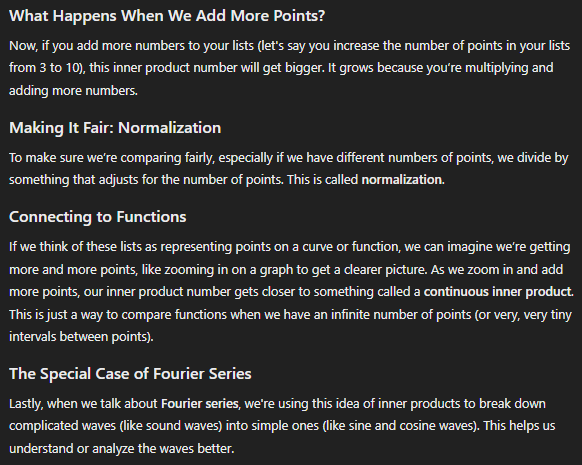

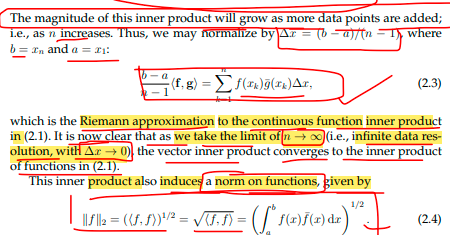

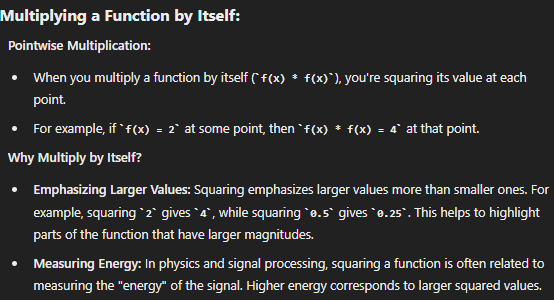

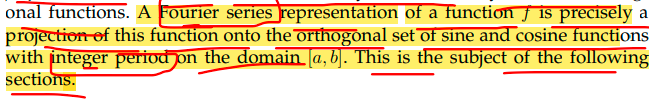

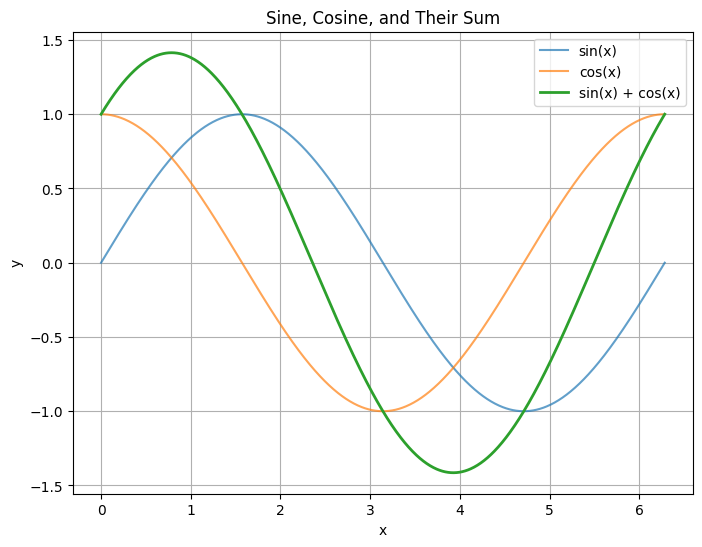

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 2*np.pi, 1000)

# Calculate the sine and cosine
sin_x = np.sin(x)
cos_x = np.cos(x)

# Create a resulting series (you can modify this to see different combinations)
result = sin_x + cos_x  # Simple addition of sine and cosine

# Plotting
plt.figure(figsize=(8, 6))

# Plot individual components
plt.plot(x, sin_x, label='sin(x)', alpha=0.7)
plt.plot(x, cos_x, label='cos(x)', alpha=0.7)

# Plot the result
plt.plot(x, result, label='sin(x) + cos(x)', linewidth=2)

plt.title('Sine, Cosine, and Their Sum')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

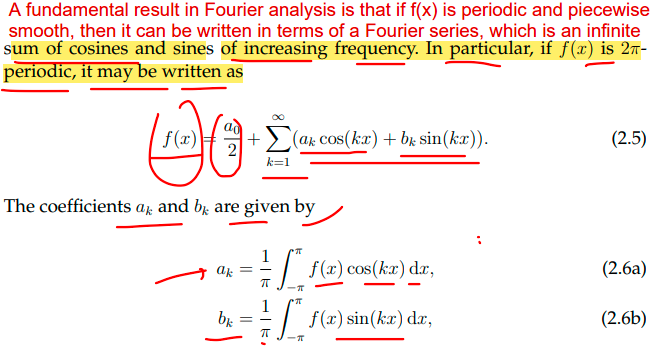

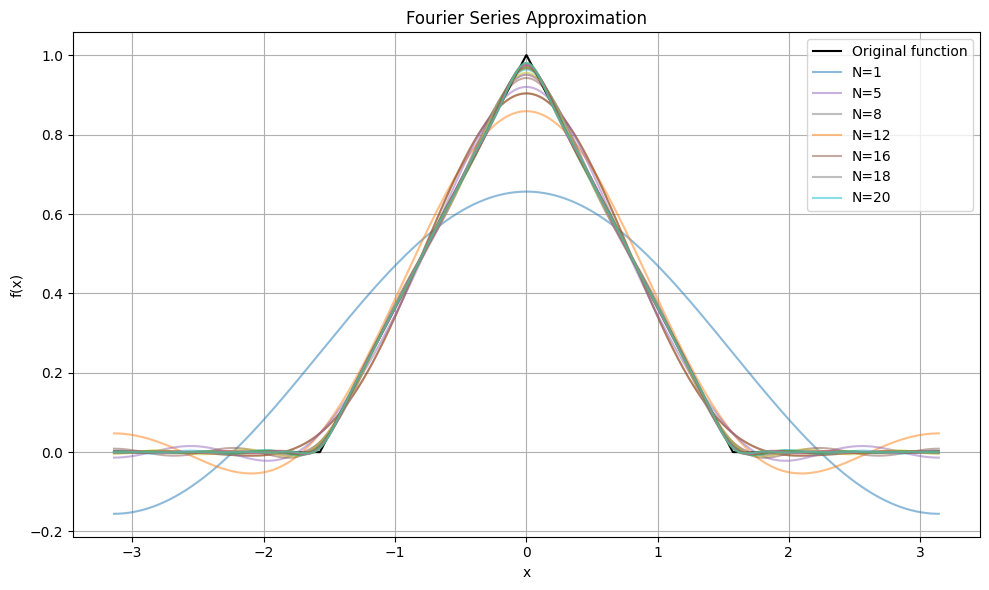

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n) * np.arange(1, nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
# Compute Fourier serie

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original function
ax.plot(x, f, 'k-', label='Original function')

# Compute Fourier series
A0 = np.sum(f) * dx
fFS = A0/2 * np.ones_like(x)

A = np.zeros(20)
B = np.zeros(20)

for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx  # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS += A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x, fFS, '-', alpha=0.5, label=f'N={k+1}' if k in [0, 4,7, 11,15,17, 19] else "")

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Fourier Series Approximation')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

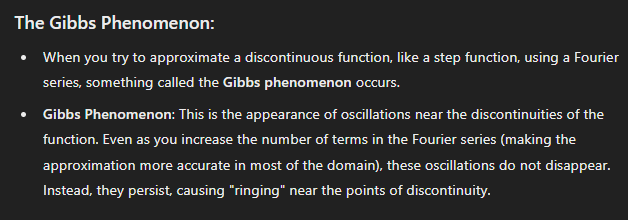

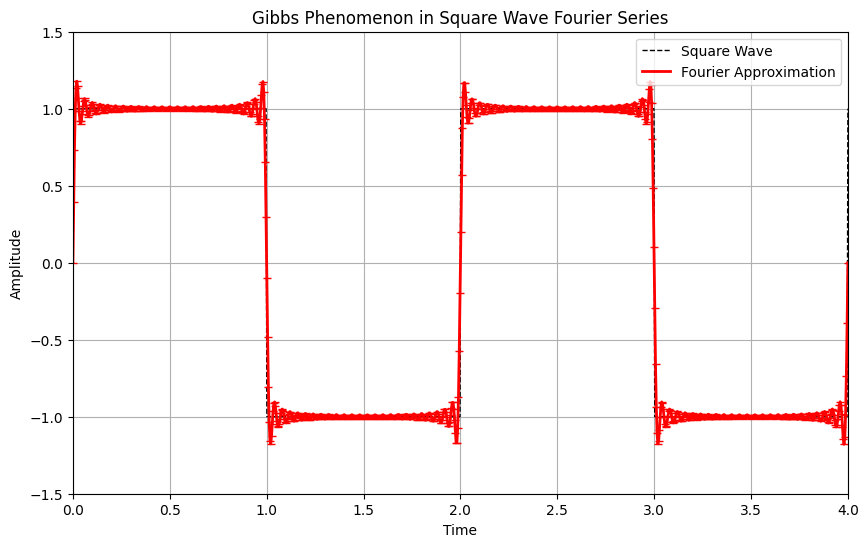

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def square_wave(t):
    return np.where((t % 2) < 1, 1, -1)

def fourier_series(t, n_terms):
    result = np.zeros_like(t)
    for n in range(1, n_terms + 1, 2):
        result += 4 / (n * np.pi) * np.sin(n * np.pi * t)
    return result

t = np.linspace(0, 4, 1000)
square = square_wave(t)
approx = fourier_series(t, 50)

plt.figure(figsize=(10, 6))
plt.plot(t, square, 'k--', linewidth=1, label='Square Wave')
plt.plot(t, approx, 'r-_', linewidth=2, label='Fourier Approximation')
plt.xlim(0, 4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Gibbs Phenomenon in Square Wave Fourier Series')
plt.legend()
plt.grid(True)
plt.show()

[-2.51552454e-02 -1.88673048e-02 -1.25786178e-02 -6.28943332e-03
 -2.44929360e-16]
[-2.48933554e-01 -1.87566653e-01 -1.25458030e-01 -6.28532900e-02
 -2.44929360e-15]
[-9.51444475e-01 -8.09571163e-01 -5.88293965e-01 -3.09316061e-01
  1.96438672e-15]


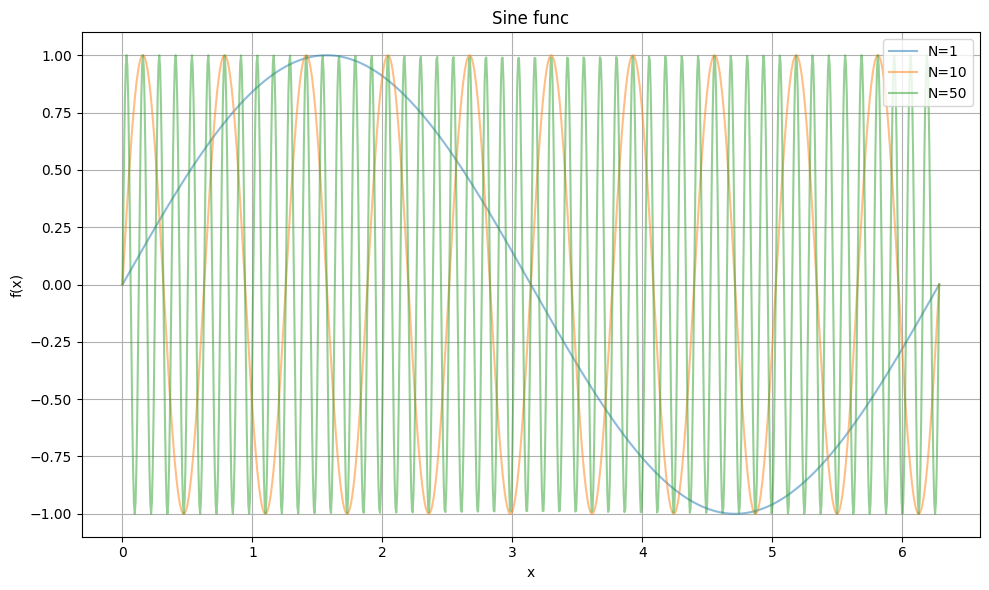

: 

In [105]:
x = np.linspace(0, 2 * np.pi, 1000)
# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 
for k in [1, 10, 50]:
    print(np.sin(k*x[-5:]))
    ax.plot(x,np.sin(k*x), '-', alpha=0.5, label=f'N={k}' "")

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Sine func')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

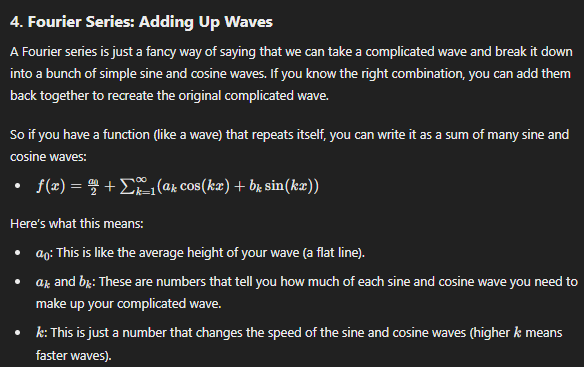

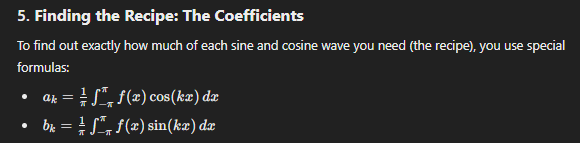

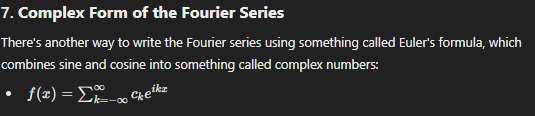

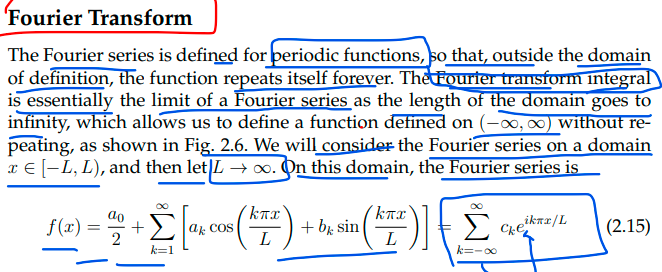

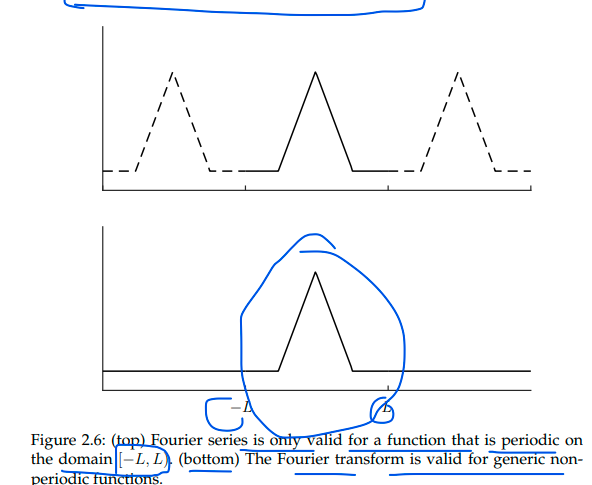

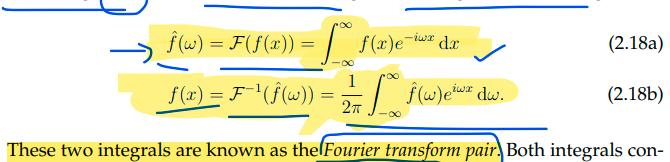

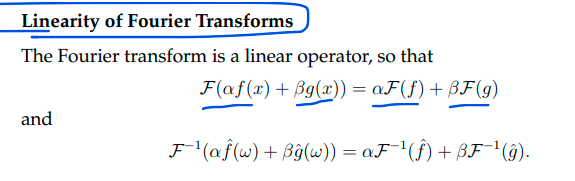

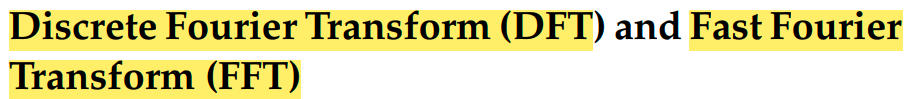

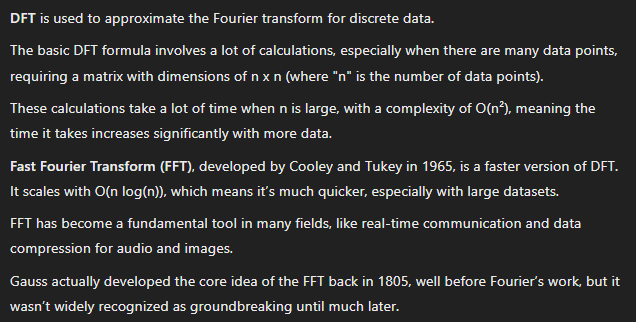

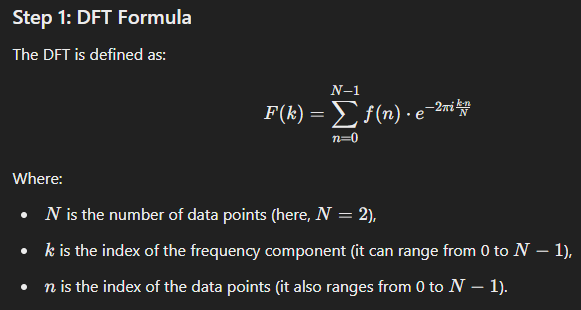

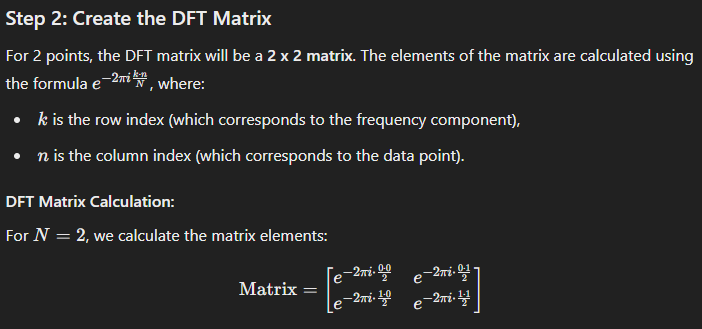

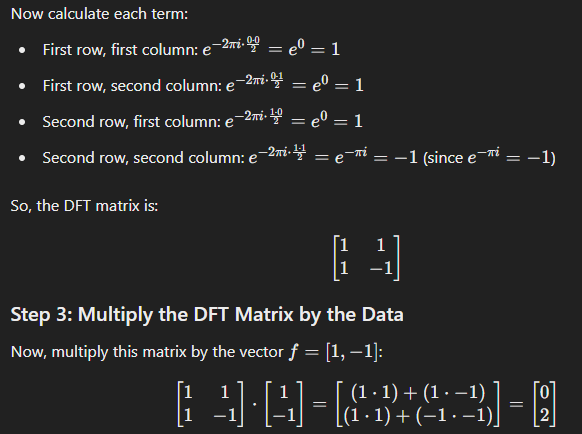

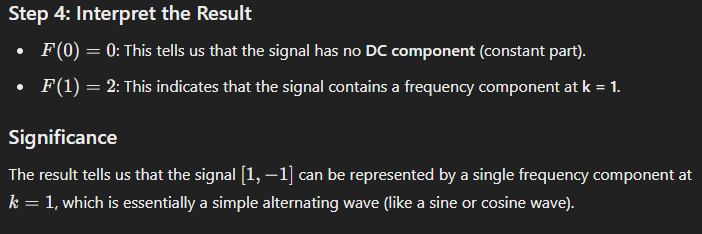

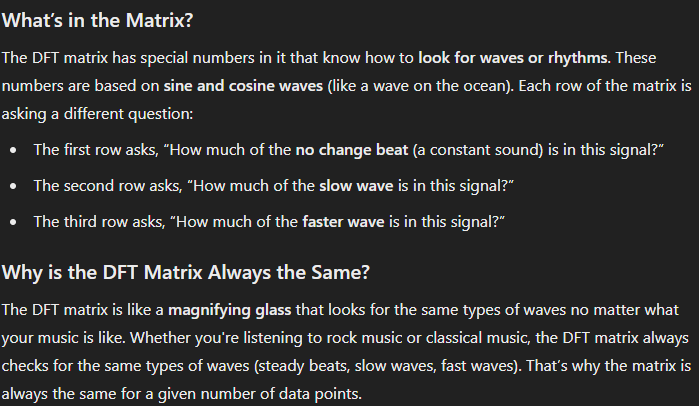

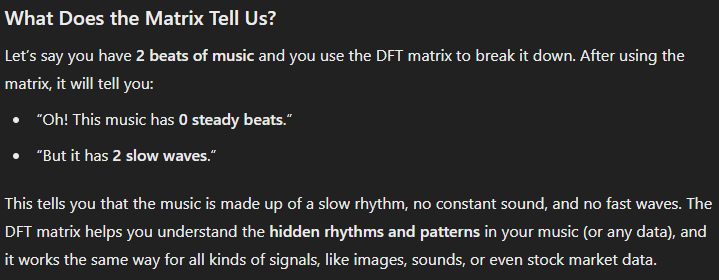

#  Generate discrete Fourier transform matrix.

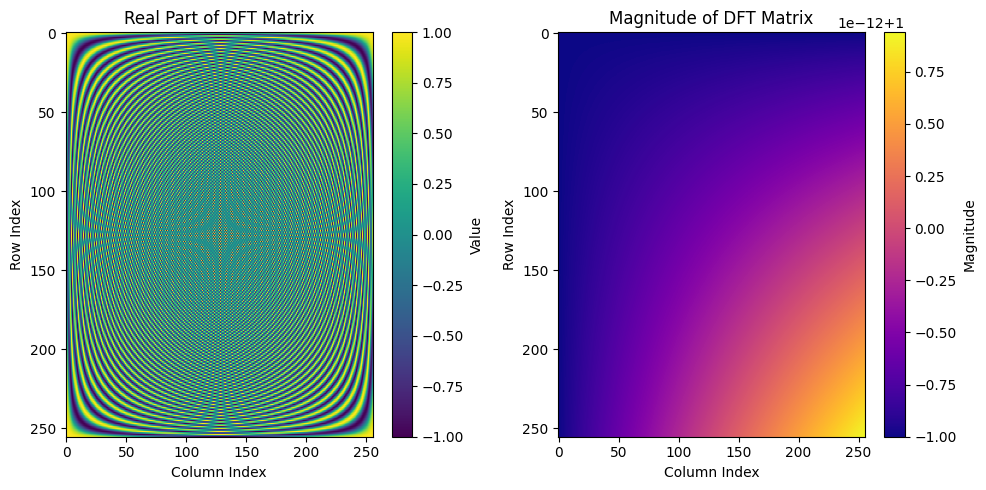

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Size of the DFT matrix
n = 256

# Calculate the fundamental frequency term
w = np.exp(-1j * 2 * np.pi / n)  # Complex exponential

# Initialize and compute the DFT matrix using meshgrid (fast method)
J, K = np.meshgrid(np.arange(n), np.arange(n))
DFT = np.power(w, J * K)

# Get the real part and magnitude
DFT_real = np.real(DFT)
DFT_magnitude = np.abs(DFT)

# Plot the real part of the DFT matrix
plt.figure(figsize=(10, 5))

# Subplot 1: Real part of the DFT matrix
plt.subplot(1, 2, 1)
plt.title("Real Part of DFT Matrix")
plt.imshow(DFT_real, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Subplot 2: Magnitude of the DFT matrix
plt.subplot(1, 2, 2)
plt.title("Magnitude of DFT Matrix")
plt.imshow(DFT_magnitude, cmap='plasma', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Show the plots
plt.tight_layout()
plt.show()


# FFT

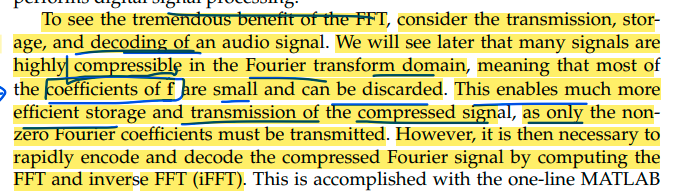

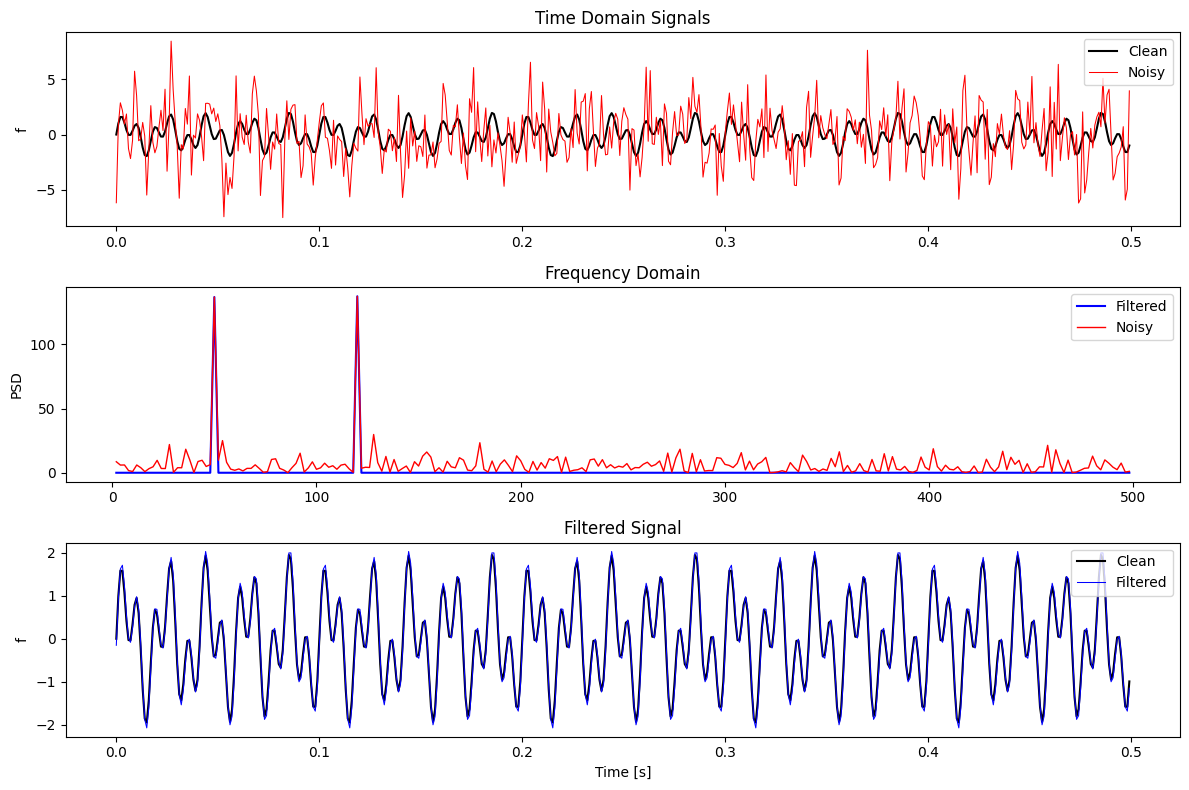

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the time array
dt = 0.001
t = np.arange(0, .50, dt)

# Create the original signal
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f.copy()

# Add noise
f = f + 2.5*np.random.randn(len(t))

# Compute the Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

# Filter out noise
indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the time domain signals
plt.subplot(3, 1, 1)
plt.plot(t, f_clean, 'k', label='Clean', linewidth=1.5)
plt.plot(t, f, 'r', label='Noisy', linewidth=0.75)
plt.legend()
plt.ylabel('f')
plt.title('Time Domain Signals')

# Plot the frequency domain
plt.subplot(3, 1, 2)
plt.plot(freq[L], PSDclean[L], 'b', label='Filtered',linewidth=1.5)
plt.plot(freq[L], PSD[L], 'r', label='Noisy',linewidth=1.0)
plt.legend()
plt.ylabel('PSD')
plt.title('Frequency Domain')

# Plot the filtered time domain signal
plt.subplot(3, 1, 3)
plt.plot(t, f_clean, 'k', label='Clean', linewidth=1.5)
plt.plot(t, ffilt, 'b', label='Filtered', linewidth=0.75)
plt.legend()
plt.ylabel('f')
plt.xlabel('Time [s]')
plt.title('Filtered Signal')

plt.tight_layout()
plt.show()

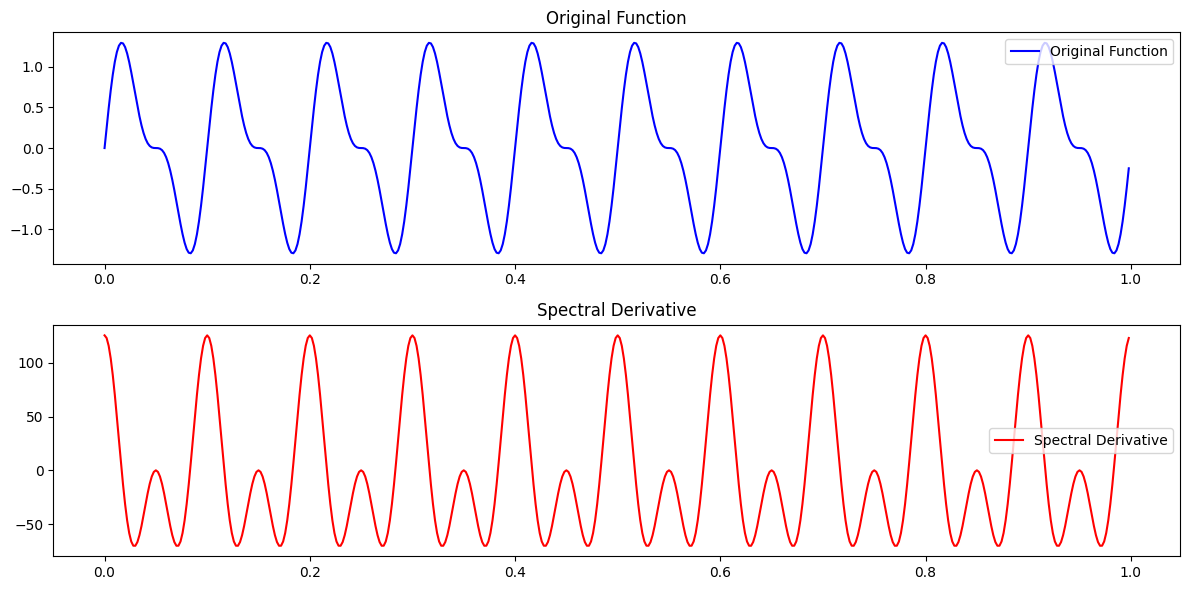

Shape of x: (500,)
Shape of f: (500,)
Shape of fhat: (500,)
Shape of kappa: (500,)
Shape of dfhat: (500,)
Shape of dfFFT: (500,)


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain and function
L = 1.0  # Length of the domain
n = 500  # Number of sample points
x = np.linspace(0, L, n, endpoint=False)
f = np.sin(2*np.pi*10*x) + 0.5*np.sin(2*np.pi*20*x)  # Example function

# Compute the FFT of f
fhat = np.fft.fft(f)

# Create wavenumber array
kappa = 2 * np.pi * np.fft.fftfreq(n, d=L/n)

# Compute the spectral derivative
dfhat = 1j * kappa * fhat

# Inverse FFT to get back to real space
dfFFT = np.real(np.fft.ifft(dfhat))

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, f, 'b', label='Original Function')
plt.legend()
plt.title('Original Function')

plt.subplot(2, 1, 2)
plt.plot(x, dfFFT, 'r', label='Spectral Derivative')
plt.legend()
plt.title('Spectral Derivative')

plt.tight_layout()
plt.show()

# Print shapes for debugging
print(f"Shape of x: {x.shape}")
print(f"Shape of f: {f.shape}")
print(f"Shape of fhat: {fhat.shape}")
print(f"Shape of kappa: {kappa.shape}")
print(f"Shape of dfhat: {dfhat.shape}")
print(f"Shape of dfFFT: {dfFFT.shape}")

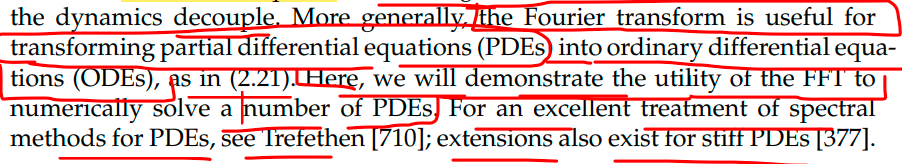

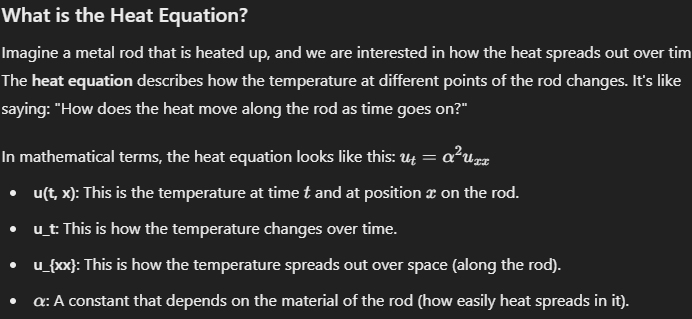

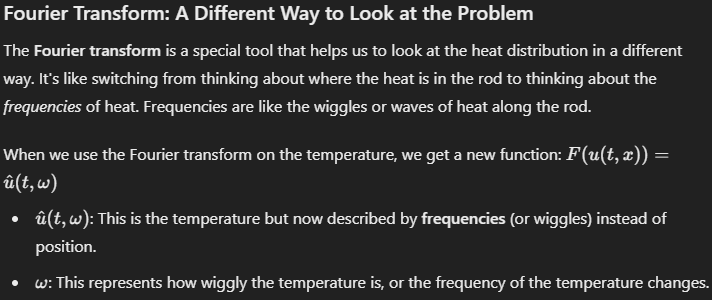

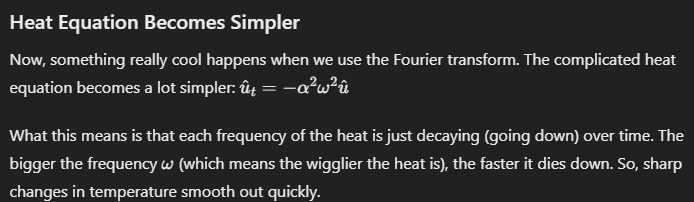

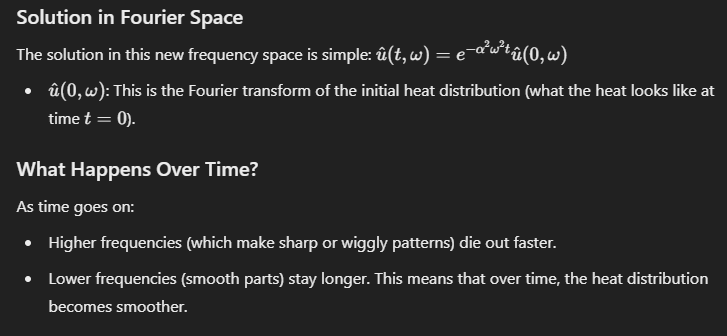

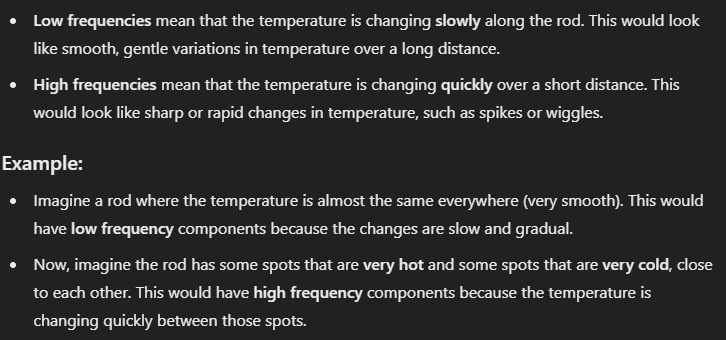

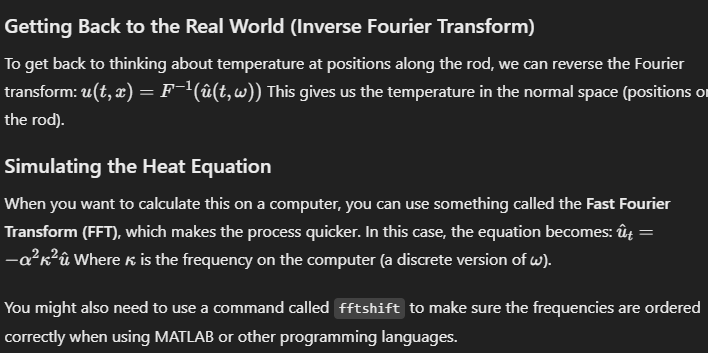

#  simulate the 1D heat equation using the Fourier transform.

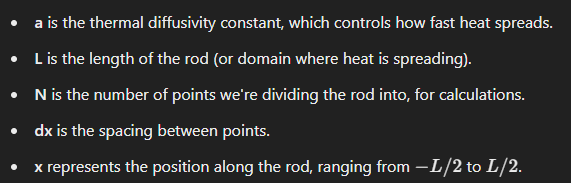
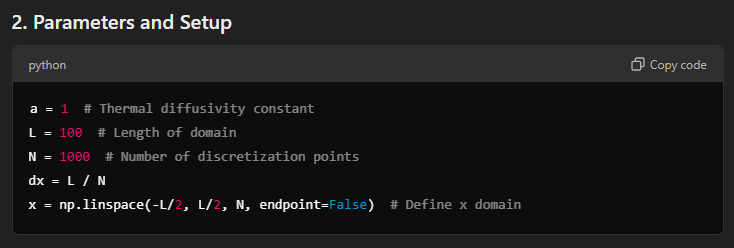

In [88]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
a = 1  # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000  # Number of discretization points
dx = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)  # Define x domain



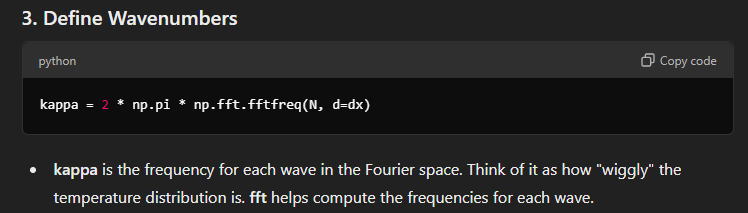

In [76]:
# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

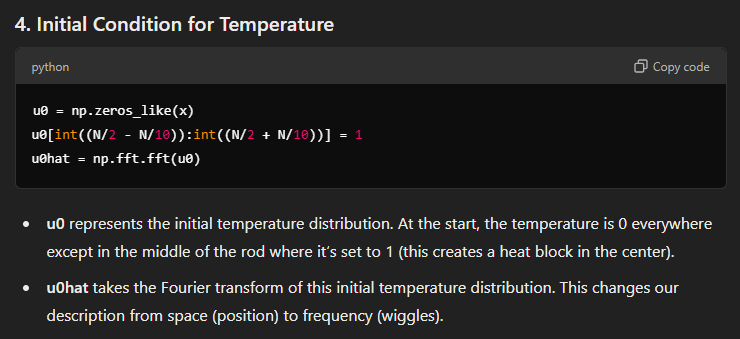

In [80]:
# Initial condition
u0 = np.zeros_like(x)
u0[int((N/2 - N/10)):int((N/2 + N/10))] = 1
u0hat = np.fft.fft(u0)

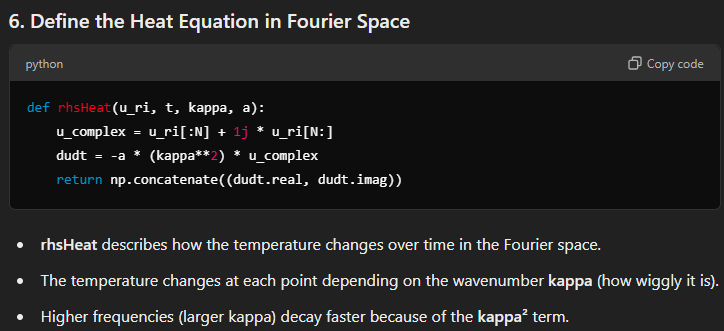

In [82]:
# Split complex array into real and imaginary parts
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Define the right-hand side of the ODE
def rhsHeat(u_ri, t, kappa, a):
    u_complex = u_ri[:N] + 1j * u_ri[N:]
    dudt = -a * (kappa**2) * u_complex
    return np.concatenate((dudt.real, dudt.imag))
                                               


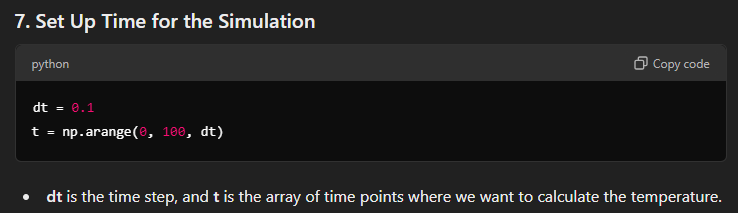

In [93]:
# Simulation parameters
dt = 0.1
t = np.arange(0, 100, dt)

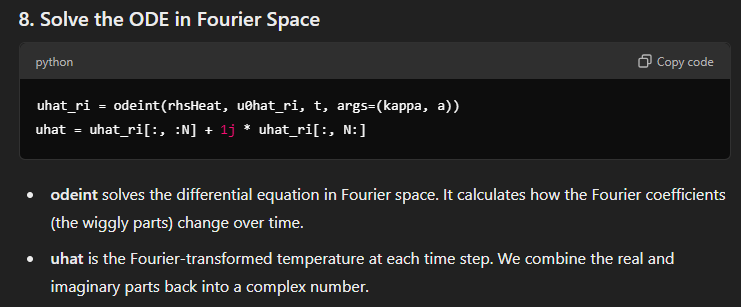

In [94]:

# Simulate in Fourier frequency domain
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa, a))
# Reconstruct complex solution
uhat = uhat_ri[:, :N] + 1j * uhat_ri[:, N:]


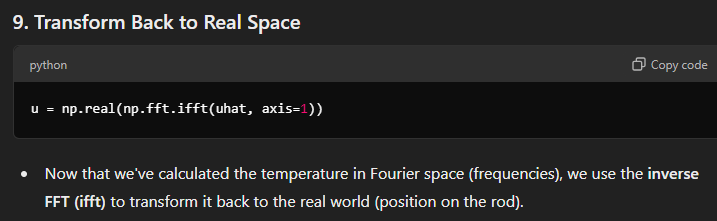

In [95]:
# Transform back to real space
u = np.real(np.fft.ifft(uhat, axis=1))

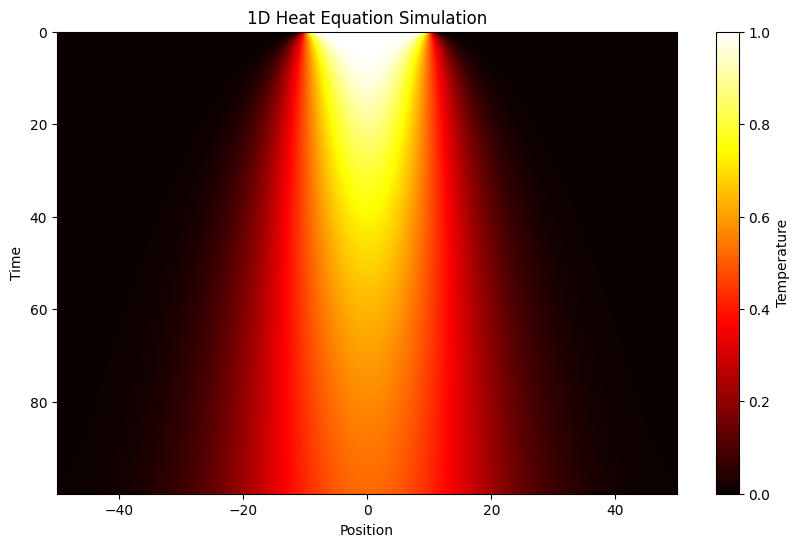

In [96]:

# Plot heat map
plt.figure(figsize=(10, 6))
plt.imshow(u, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('1D Heat Equation Simulation')
plt.show()

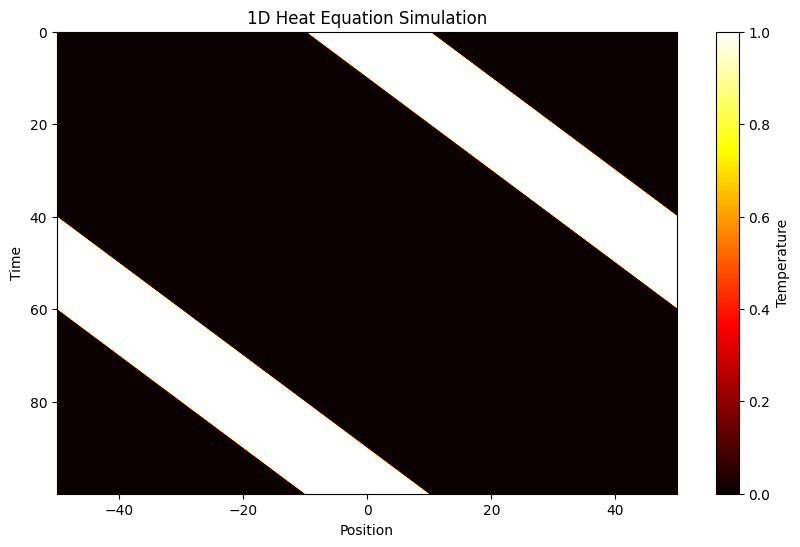

In [63]:
def rhsWave(uhat_ri,t,kappa,c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c*(1j)*kappa*uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

# Simulation parameters
dt = 0.1
t = np.arange(0, 100, dt)

# Simulate in Fourier frequency domain
uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa, a))

# Reconstruct complex solution
uhat = uhat_ri[:, :N] + 1j * uhat_ri[:, N:]

# Transform back to real space
u = np.real(np.fft.ifft(uhat, axis=1))

# Plot heat map
plt.figure(figsize=(10, 6))
plt.imshow(u, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('1D Heat Equation Simulation')
plt.show()

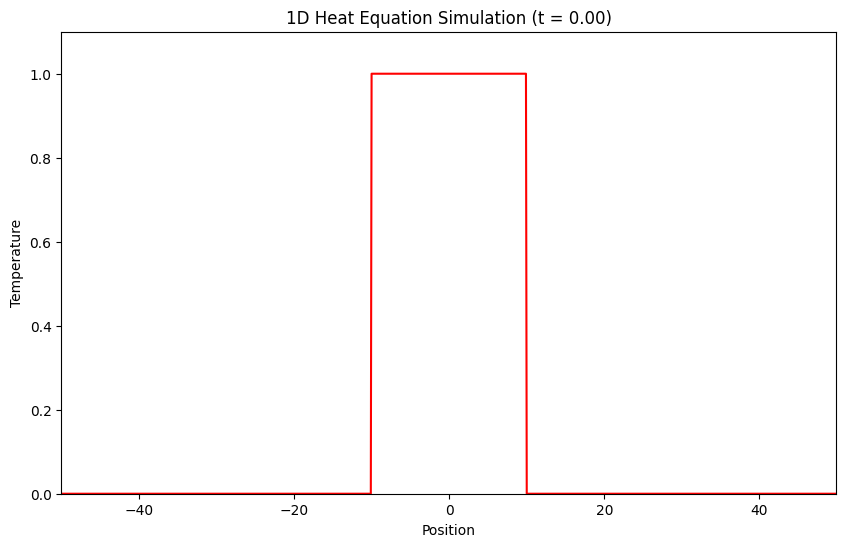

In [60]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
a = 1  # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000  # Number of discretization points
dx = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)  # Define x domain

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0[int((N/2 - N/10)):int((N/2 + N/10))] = 1
u0hat = np.fft.fft(u0)

# Split complex array into real and imaginary parts
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Define the right-hand side of the ODE
def rhsHeat(u_ri, t, kappa, a):
    u_complex = u_ri[:N] + 1j * u_ri[N:]
    dudt = -a * (kappa**2) * u_complex
    return np.concatenate((dudt.real, dudt.imag))


# Simulation parameters
dt = 0.1
t = np.arange(0, 10, dt)

# Simulate in Fourier frequency domain
uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa, a))

# Reconstruct complex solution
uhat = uhat_ri[:, :N] + 1j * uhat_ri[:, N:]

# Transform back to real space
u = np.real(np.fft.ifft(uhat, axis=1))

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, u[0], 'r-')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(0, 1.1)
ax.set_xlabel('Position')
ax.set_ylabel('Temperature')
ax.set_title('1D Heat Equation Simulation')

# Animation update function
def update(frame):
    line.set_ydata(u[frame])
    ax.set_title(f'1D Heat Equation Simulation (t = {t[frame]:.2f})')
    return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# Display the animation
plt.show()


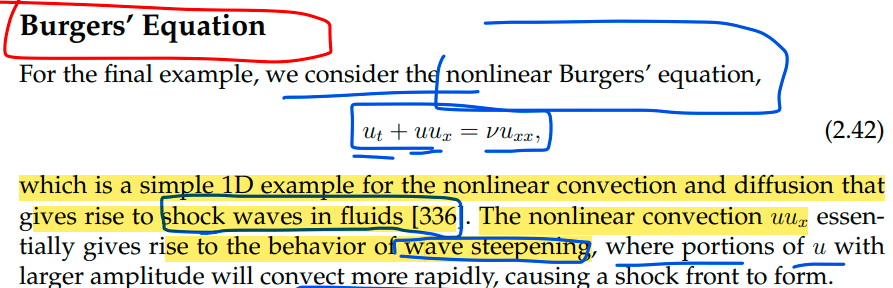

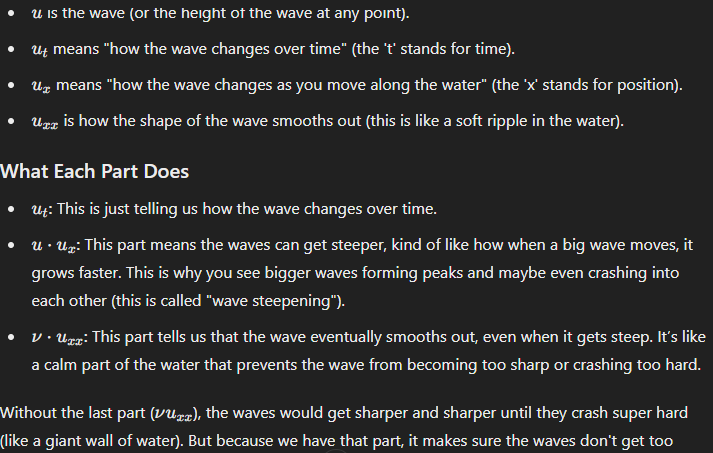

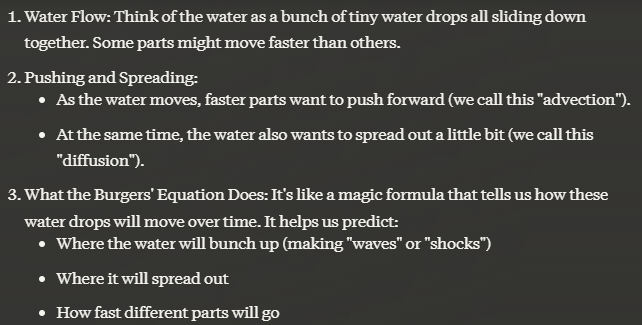

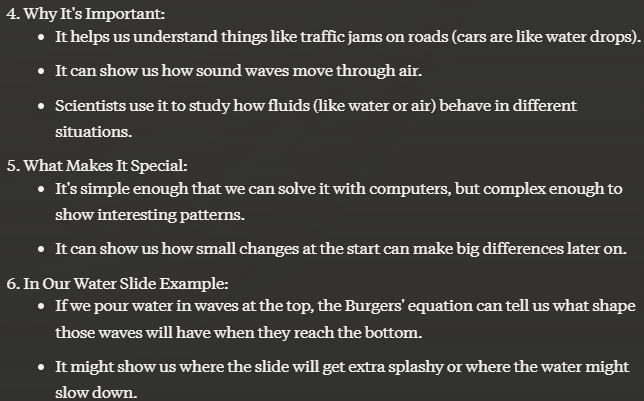

      So here the situation is 
        
        LHS ::
            ut is saying how a point x will evolve in time whie the rest part telling 
            if you move across the surface at same time frame how the suface will behave {gets stipper or smoothens out}

        the second term holding the relation of a point ux to other points in the surface


        so this part should be a constant mean if a wave it steeper so ut should be less , means it smooth out faster

        RHS ::
            uxx is saying how a point at x will collapse , because the left side having dependency on time as well as rest of the wave points 
            it has a constant multiply 


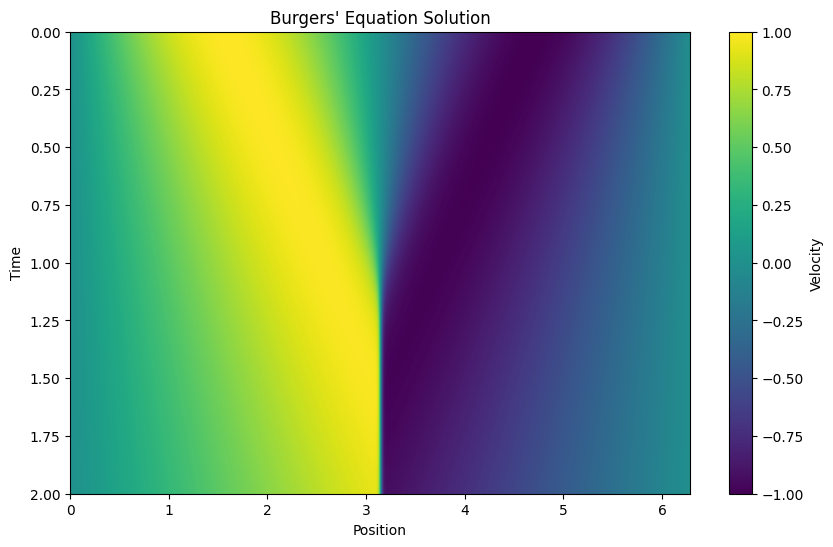

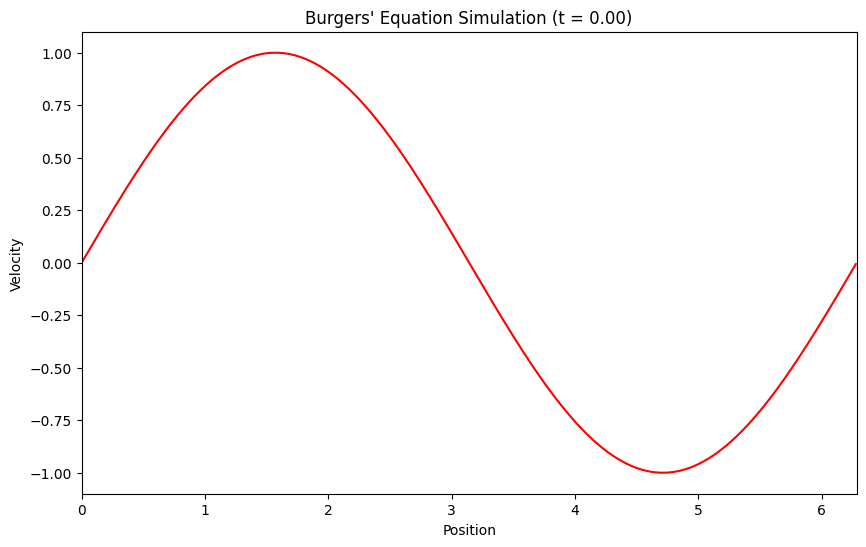

In [110]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
nu = 0.01  # Viscosity
L = 2 * np.pi  # Domain length
N = 1000  # Number of spatial points
dx = L / N
x = np.linspace(0, L, N, endpoint=False)  # Spatial domain

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.sin(x)

# Define the right-hand side of the Burgers' equation
def rhsBurgers(u, t, kappa, nu):
    uhat = np.fft.fft(u)
    d_uhat = 1j * kappa * uhat
    dd_uhat = -np.power(kappa, 2) * uhat
    d_u = np.fft.ifft(d_uhat)
    dd_u = np.fft.ifft(dd_uhat)
    du_dt = -u * d_u.real + nu * dd_u.real
    return du_dt.real

# Simulation parameters
t = np.linspace(0, 2, 200)  # Time domain

# Solve the Burgers' equation
u = odeint(rhsBurgers, u0, t, args=(kappa, nu))

# Create static plot
plt.figure(figsize=(10, 6))
plt.imshow(u, aspect='auto', extent=[0, L, t[-1], t[0]], cmap='viridis')
plt.colorbar(label='Velocity')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title("Burgers' Equation Solution")
plt.show()

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, u[0], 'r-')
ax.set_xlim(0, L)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title("Burgers' Equation Simulation")

# Animation update function
def update(frame):
    line.set_ydata(u[frame])
    ax.set_title(f"Burgers' Equation Simulation (t = {t[frame]:.2f})")
    return line,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# Display the animation
plt.show()


In [113]:
anim.save('burgers_equation_simulation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


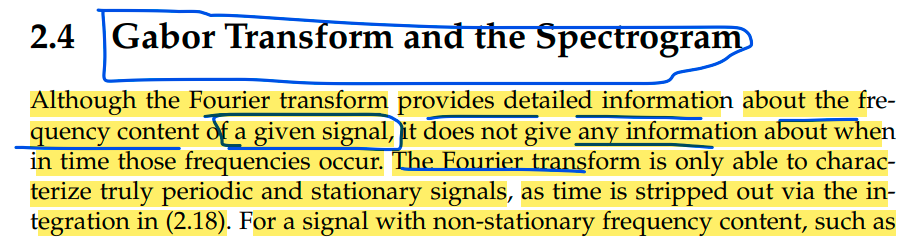

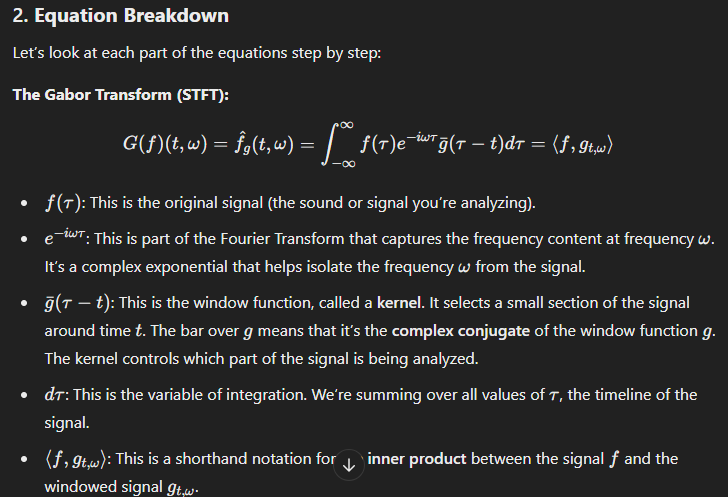

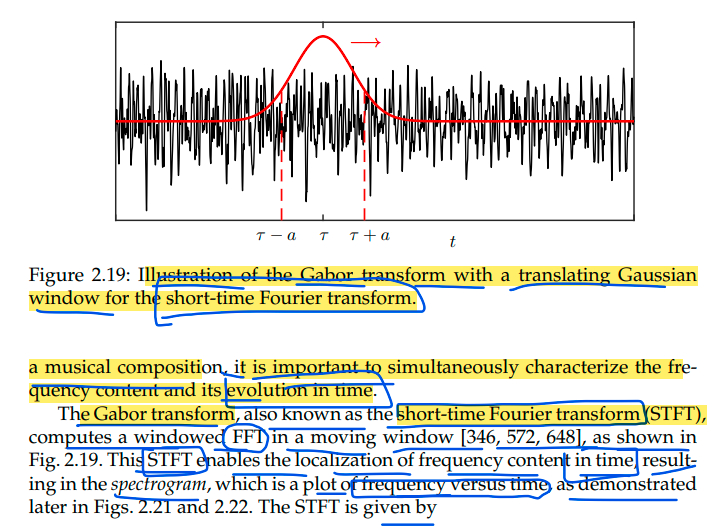

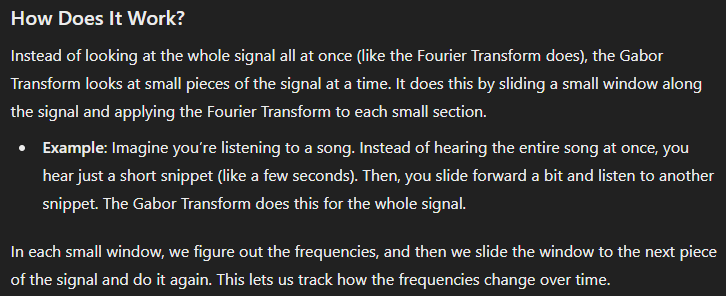

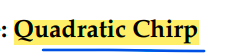

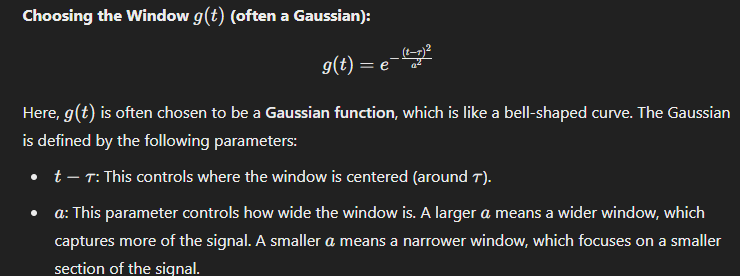

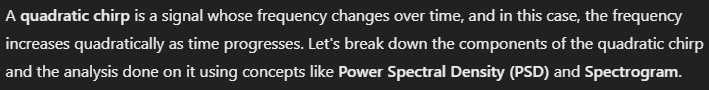

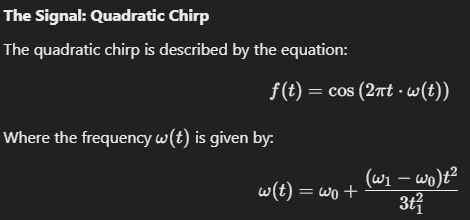

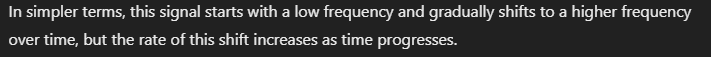

(array([[1.39668406e-08, 7.78602394e-08, 1.16558502e-07, ...,
         4.11689845e-13, 5.70111830e-13, 2.12662544e-12],
        [9.32543413e-08, 2.31432956e-07, 3.15146725e-07, ...,
         9.09296742e-13, 1.15161414e-12, 4.36352031e-12],
        [4.72026418e-07, 6.48970513e-07, 7.56007698e-07, ...,
         1.17268431e-12, 1.18771967e-12, 4.70630144e-12],
        ...,
        [1.34857401e-14, 6.34472067e-15, 2.41640612e-15, ...,
         5.61368704e-12, 5.09125769e-12, 6.26118578e-13],
        [1.22739045e-14, 4.66197138e-15, 6.06301098e-16, ...,
         5.50738421e-12, 4.78812967e-12, 2.82921760e-13],
        [5.93974734e-15, 2.05413584e-15, 4.23960289e-18, ...,
         2.73621429e-12, 2.34451415e-12, 8.56119918e-14]]),
 array([  0.    ,   7.8125,  15.625 ,  23.4375,  31.25  ,  39.0625,
         46.875 ,  54.6875,  62.5   ,  70.3125,  78.125 ,  85.9375,
         93.75  , 101.5625, 109.375 , 117.1875, 125.    , 132.8125,
        140.625 , 148.4375, 156.25  , 164.0625, 171.875 , 179

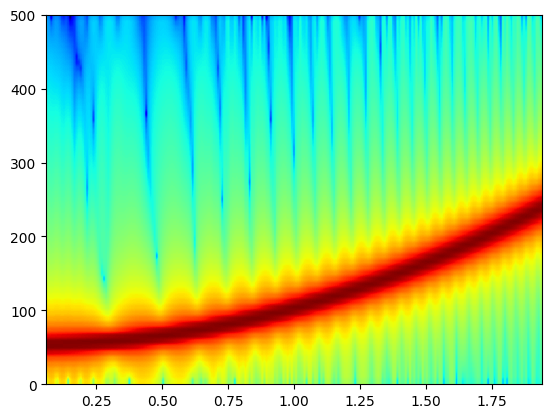

In [109]:
dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')

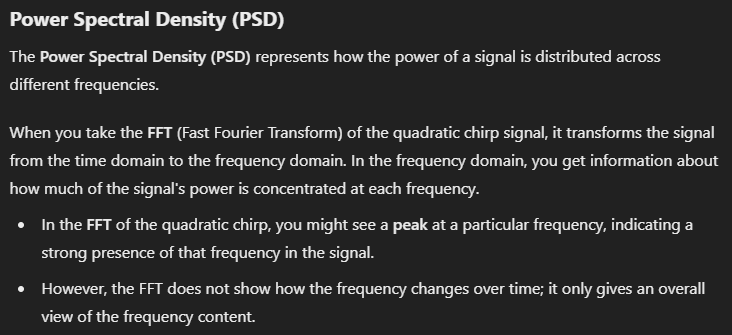
#  ______________________________________________________________________________________________ 
# Laplace Transform

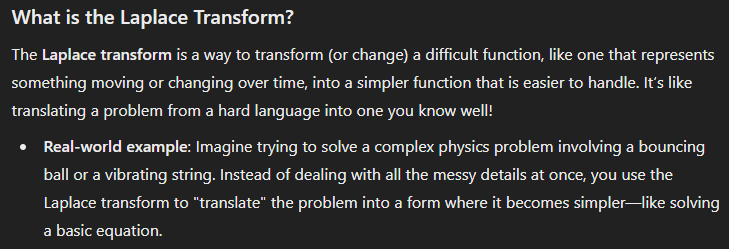

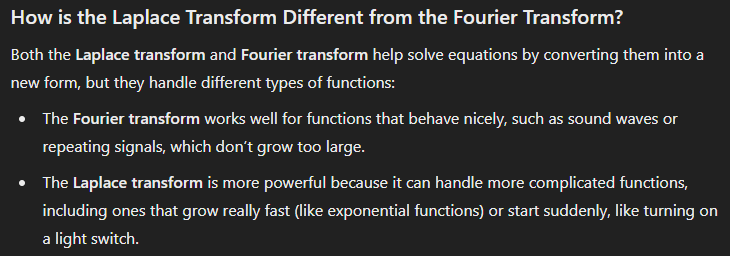

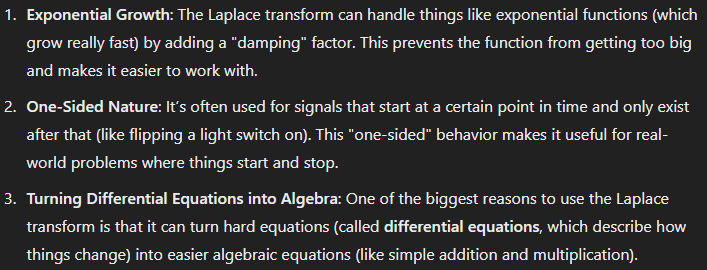

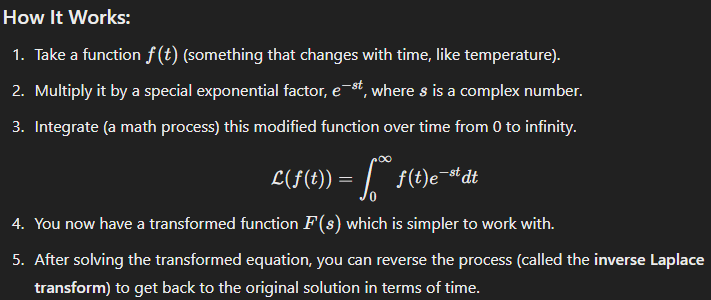

# Uncertainty Principles

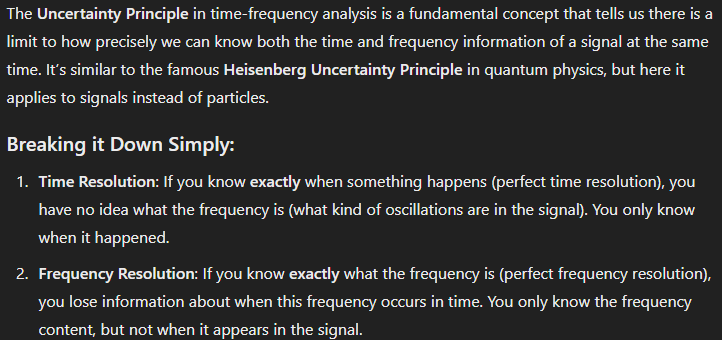

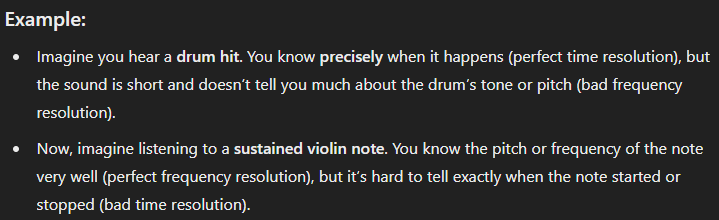

# WAVELETS

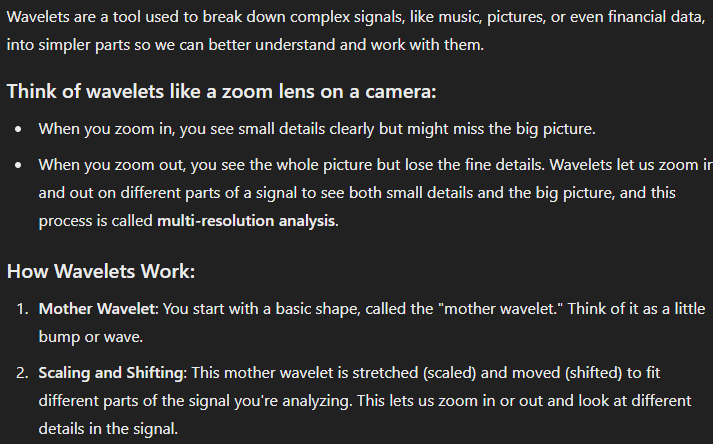

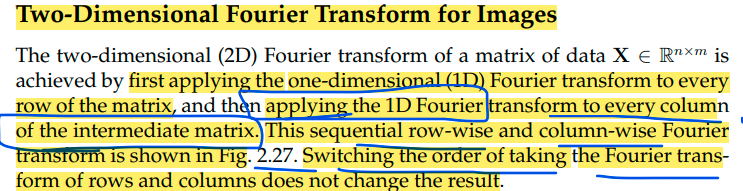

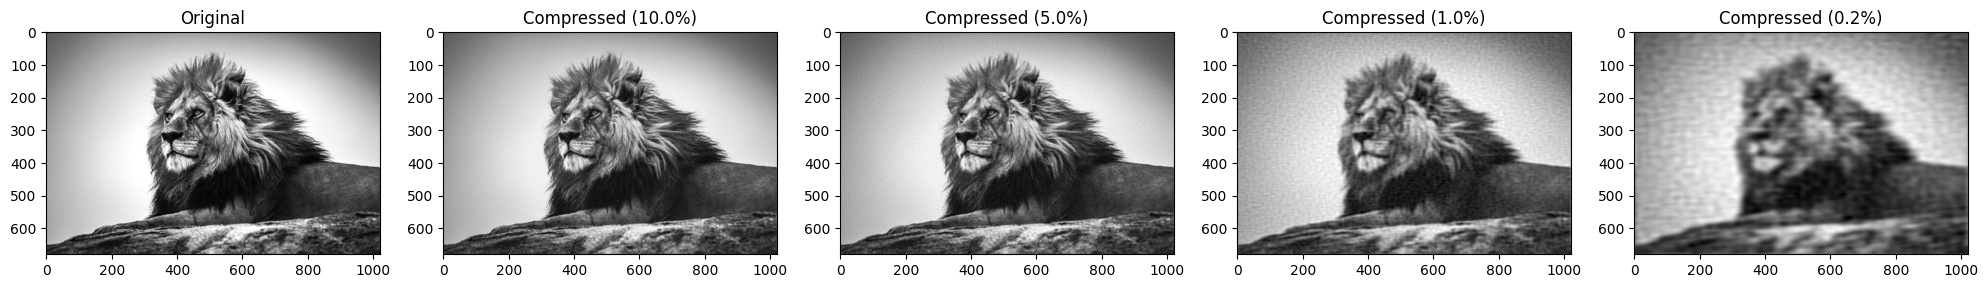

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def compress_image(image_path, keep_frequencies):
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Perform 2D FFT
    fft = np.fft.fft2(img_array)
    fft_shift = np.fft.fftshift(fft)
    
    # Sort FFT coefficients
    fft_sort = np.sort(np.abs(fft_shift.reshape(-1)))
    
    # Plot original image
    plt.figure(figsize=(20, 5))
    plt.subplot(151), plt.imshow(img_array, cmap='gray'), plt.title('Original')
    
    for i, keep in enumerate(keep_frequencies):
        # Calculate threshold
        thresh = fft_sort[int(np.floor((1-keep)*len(fft_sort)))]
        
        # Create mask and apply threshold
        mask = np.abs(fft_shift) > thresh
        fft_filtered = fft_shift * mask
        
        # Inverse FFT
        img_reconstructed = np.fft.ifft2(np.fft.ifftshift(fft_filtered)).real
        
        # Plot reconstructed image
        plt.subplot(152+i), plt.imshow(img_reconstructed, cmap='gray')
        plt.title(f'Compressed ({keep*100:.1f}%)')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "lion.jpg"
keep_frequencies = [0.1, 0.05, 0.01, 0.002]
compress_image(image_path, keep_frequencies)

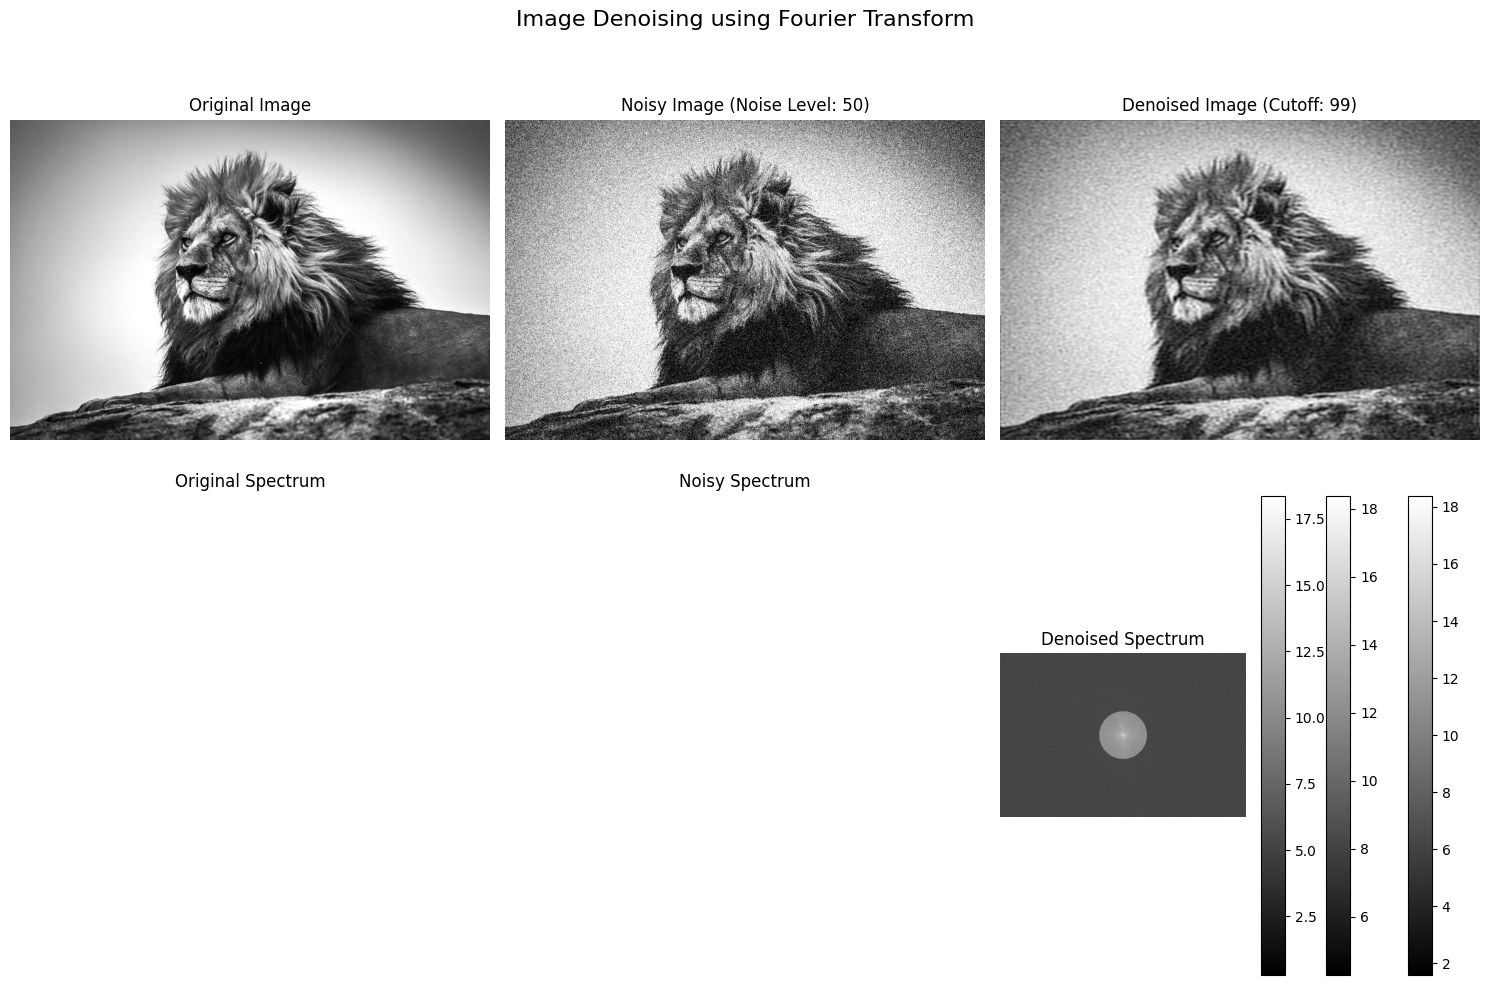

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_noise(image, noise_level):
    """Add Gaussian noise to the image."""
    noisy_image = image + noise_level * np.random.randn(*image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def low_pass_filter(shape, cutoff):
    """Create a low-pass filter mask."""
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[-center_row:rows-center_row, -center_col:cols-center_col]
    mask = x*x + y*y <= cutoff*cutoff
    return mask

def denoise_image(image, cutoff):
    """Denoise the image using Fourier Transform and low-pass filter."""
    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the low-pass filter
    mask = low_pass_filter(image.shape, cutoff)
    f_shift_filtered = f_shift * mask
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(f_shift_filtered)
    denoised_image = np.fft.ifft2(f_ishift).real
    
    return np.clip(denoised_image, 0, 255).astype(np.uint8)

def plot_spectrum(f_transform, title):
    """Plot the frequency spectrum."""
    spectrum = np.log(np.abs(f_transform) + 1)
    plt.imshow(spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()

def process_and_plot(image_path, noise_level, cutoff):
    # Load and convert image to grayscale
    original = np.array(Image.open(image_path).convert('L'))
    
    # Add noise
    noisy = add_noise(original, noise_level)
    
    # Denoise
    denoised = denoise_image(noisy, cutoff)
    
    # Plot results
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Image Denoising using Fourier Transform', fontsize=16)
    
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')
    
    axes[0, 1].imshow(noisy, cmap='gray')
    axes[0, 1].set_title(f'Noisy Image (Noise Level: {noise_level})')
    
    axes[0, 2].imshow(denoised, cmap='gray')
    axes[0, 2].set_title(f'Denoised Image (Cutoff: {cutoff})')
    
    plot_spectrum(np.fft.fftshift(np.fft.fft2(original)), 'Original Spectrum')
    axes[1, 0].set_title('Original Spectrum')
    
    plot_spectrum(np.fft.fftshift(np.fft.fft2(noisy)), 'Noisy Spectrum')
    axes[1, 1].set_title('Noisy Spectrum')
    
    plot_spectrum(np.fft.fftshift(np.fft.fft2(denoised)), 'Denoised Spectrum')
    axes[1, 2].set_title('Denoised Spectrum')
    
    for ax in axes.flat:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "lion.jpg"
noise_level = 50  # Adjust noise level as needed
cutoff = 99  # Adjust cutoff frequency as needed

process_and_plot(image_path, noise_level, cutoff)

In [ ]:
!pip install PyWavelets

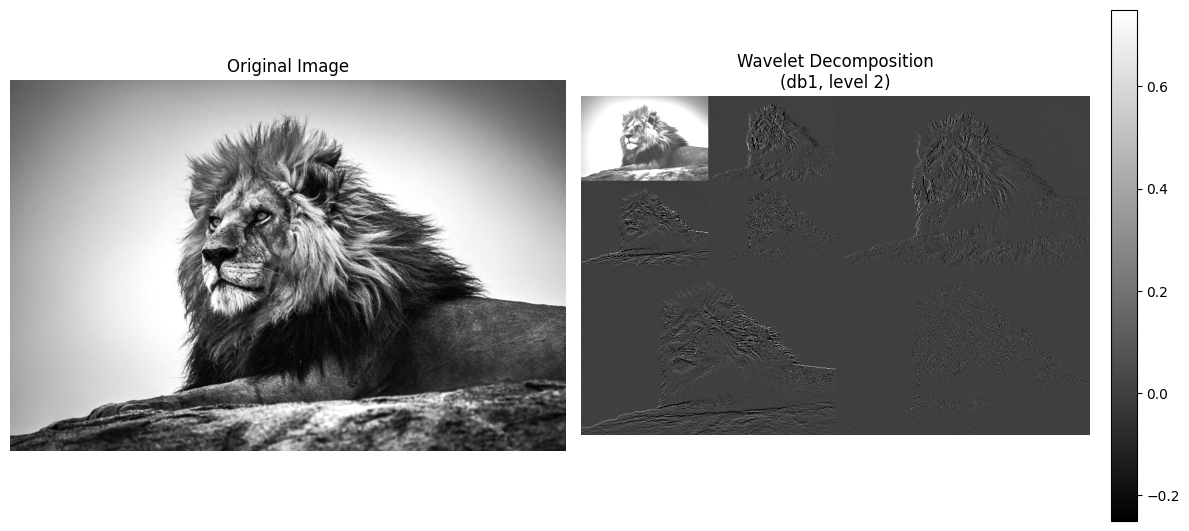

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pywt

def load_image(image_path):
    """Load an image and convert it to grayscale."""
    return np.array(Image.open(image_path).convert('L'))

def normalize_coeffs(coeffs):
    """Normalize wavelet coefficients."""
    normalized = [coeffs[0] / np.abs(coeffs[0]).max()]
    for detail_level in coeffs[1:]:
        normalized.append([d / np.abs(d).max() for d in detail_level])
    return normalized

def plot_wavelet_decomposition(image, wavelet, level):
    """Perform wavelet decomposition and plot the results."""
    # Wavelet decomposition
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    
    # Normalize coefficients
    normalized_coeffs = normalize_coeffs(coeffs)
    
    # Convert coefficients to array
    arr, _ = pywt.coeffs_to_array(normalized_coeffs)
    
    # Plot original image and wavelet decomposition
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    im = ax2.imshow(arr, cmap='gray', vmin=-0.25, vmax=0.75)
    ax2.set_title(f'Wavelet Decomposition\n({wavelet}, level {level})')
    ax2.axis('off')
    
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "lion.jpg"  # Replace with your image path
wavelet = 'db1'  # Wavelet type (e.g., 'db1', 'sym2', 'coif1', etc.)
level = 2  # Decomposition level

# Load image
image = load_image(image_path)

# Plot wavelet decomposition
plot_wavelet_decomposition(image, wavelet, level)

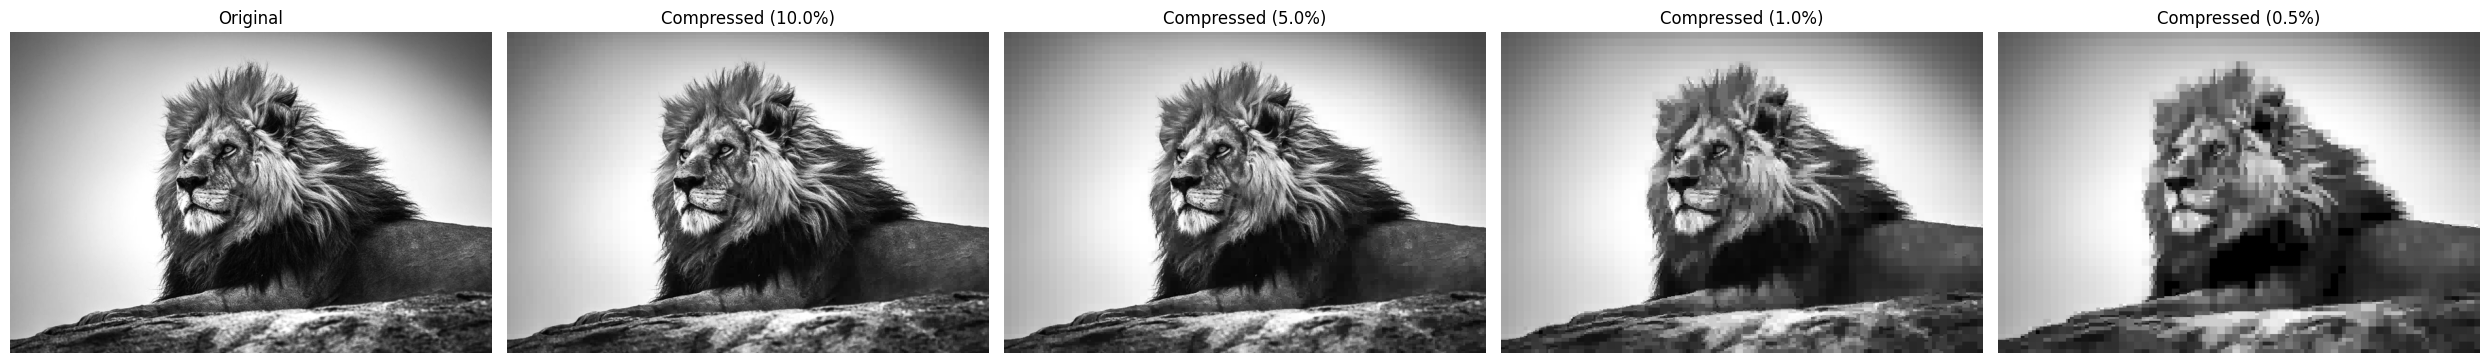

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pywt

def load_image(image_path):
    """Load an image and convert it to grayscale."""
    return np.array(Image.open(image_path).convert('L'))

def compress_image(image, wavelet, level, keep_percentages):
    """Compress image using wavelet decomposition and coefficient thresholding."""
    # Wavelet decomposition
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    
    # Convert coefficients to array
    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    
    # Sort coefficients by magnitude
    coeff_sort = np.sort(np.abs(coeff_arr.reshape(-1)))
    
    compressed_images = []
    
    for keep in keep_percentages:
        # Calculate threshold
        thresh = coeff_sort[int(np.floor((1-keep)*len(coeff_sort)))]
        
        # Threshold small coefficients
        ind = np.abs(coeff_arr) > thresh
        coeff_filt = coeff_arr * ind
        
        # Convert filtered coefficients back to nested list
        coeffs_filt = pywt.array_to_coeffs(coeff_filt, coeff_slices, output_format='wavedec2')
        
        # Reconstruct image
        img_recon = pywt.waverec2(coeffs_filt, wavelet=wavelet)
        
        # Clip values to valid range and convert to uint8
        img_recon = np.clip(img_recon, 0, 255).astype('uint8')
        
        compressed_images.append(img_recon)
    
    return compressed_images

def plot_results(original, compressed_images, keep_percentages):
    """Plot original image and compressed versions."""
    n_images = len(compressed_images) + 1
    fig, axes = plt.subplots(1, n_images, figsize=(5*n_images, 5))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    for ax, img, keep in zip(axes[1:], compressed_images, keep_percentages):
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Compressed ({keep*100:.1f}%)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "lion.jpg"  # Replace with your image path
wavelet = 'db1'  # Wavelet type
level = 4  # Decomposition level
keep_percentages = [0.1, 0.05, 0.01, 0.005]  # Percentages of coefficients to keep

# Load image
original_image = load_image(image_path)

# Compress image
compressed_images = compress_image(original_image, wavelet, level, keep_percentages)

# Plot results
plot_results(original_image, compressed_images, keep_percentages)